<a href="https://colab.research.google.com/github/CA683-Group99/Wind-Energy-Prediction/blob/main/4_IslandElectricity_autoreg_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 5.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [3]:
from statsmodels.tsa.ar_model import AutoReg

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#newdf = pd.read_csv(r"C:\Users\E\Documents\IslandElectricityOnly2017_202015min_v3Clean.csv",index_col=0,parse_dates=[2], na_values=" ")

newdf = pd.read_csv('/content/drive/MyDrive/CA683Project/IslandElectricityOnly2017_202015min_v3Clean.csv', parse_dates=[2], na_values=" ")

In [6]:
newdf.dtypes  # date should be datetime64[ns]

Unnamed: 0                       int64
Unnamed: 0.1                     int64
date                    datetime64[ns]
Year                             int64
Month                           object
DayTime                         object
 REGION                         object
ActualDemandMW                 float64
 FORECAST DEMAND(MW)           float64
ForecastWndMW                  float64
ActualWindMW                   float64
ActualGenerationMW             float64
hour                             int64
isweekday                         bool
month                            int64
NetTotal_MW                    float64
EWIC_MW                        float64
MOYLE_MW                       float64
year                             int64
dtype: object

In [7]:
newdf["ActualWindMW"].isnull().sum()

0

In [8]:
newdf.isnull().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
date                         0
Year                         0
Month                        0
DayTime                      0
 REGION                      0
ActualDemandMW               0
 FORECAST DEMAND(MW)    128559
ForecastWndMW               12
ActualWindMW                 0
ActualGenerationMW           0
hour                         0
isweekday                    0
month                        0
NetTotal_MW                  0
EWIC_MW                     16
MOYLE_MW                    16
year                         0
dtype: int64

In [9]:
# Catherine: Change to prevent index warning
newdf = newdf.reset_index()
newdf.date

0        2017-07-01 00:15:00
1        2017-07-01 00:30:00
2        2017-07-01 00:45:00
3        2017-07-01 01:00:00
4        2017-07-01 01:15:00
                 ...        
128554   2021-02-28 22:45:00
128555   2021-02-28 23:00:00
128556   2021-02-28 23:15:00
128557   2021-02-28 23:30:00
128558   2021-02-28 23:45:00
Name: date, Length: 128559, dtype: datetime64[ns]

In [10]:
X = newdf['ActualWindMW']

train=X[:len(X)-20]
test=X[len(X)-22:]

model=AutoReg(train,lags=24).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


                            AutoReg Model Results                             
Dep. Variable:           ActualWindMW   No. Observations:               128539
Model:                    AutoReg(24)   Log Likelihood             -676899.561
Method:               Conditional MLE   S.D. of innovations             46.906
Date:                Sat, 17 Apr 2021   AIC                              7.697
Time:                        10:08:58   BIC                              7.699
Sample:                            24   HQIC                             7.697
                               128539                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            4.9327      0.232     21.268      0.000       4.478       5.387
ActualWindMW.L1      1.2358      0.003    443.006      0.000       1.230       1.241
ActualWindMW.L2     -0.1078 

In [11]:
print('Shape of data',newdf.shape)
print('Original dataset',newdf.head())
print('After extracting only AR attribute',X)

Shape of data (128559, 20)
Original dataset    index  Unnamed: 0  Unnamed: 0.1  ... EWIC_MW  MOYLE_MW  year
0      0       17377         17377  ...  -240.0     -56.0  2017
1      1       17378         17378  ...  -277.0      34.0  2017
2      2       17379         17379  ...  -277.0     -68.0  2017
3      3       17380         17380  ...  -277.0     -48.0  2017
4      4       17381         17381  ...  -325.0    -122.0  2017

[5 rows x 20 columns]
After extracting only AR attribute 0          346.0
1          370.0
2          405.0
3          406.0
4          413.0
           ...  
128554    1072.0
128555    1068.0
128556    1041.0
128557    1017.0
128558    1010.0
Name: ActualWindMW, Length: 128559, dtype: float64


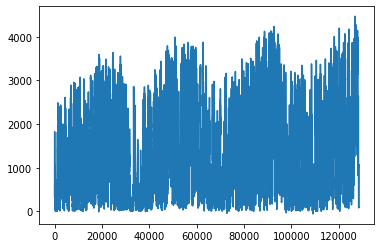

In [12]:
X.plot()

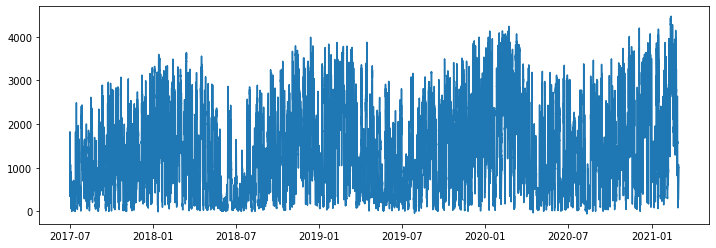

In [13]:
fig = plt.figure(figsize=(12, 4))
pyplot.plot(newdf.date, newdf.ActualWindMW, label="ActualWindMW")

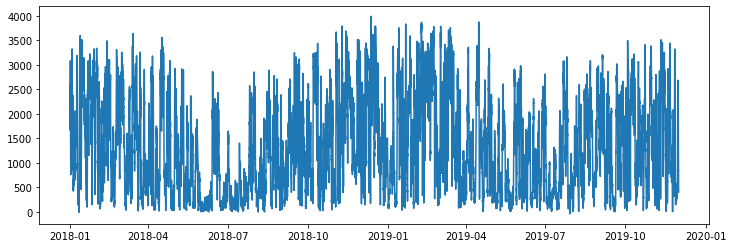

In [14]:
from datetime import datetime
start_date = datetime(2018,1,1)
end_date = datetime(2019,12,1)
reducedDS = newdf.loc[(newdf.date >  start_date) & (newdf.date <= end_date)]

fig = plt.figure(figsize=(12, 4))
pyplot.plot(reducedDS.date, reducedDS.ActualWindMW, label="ActualWindMW")



In [15]:
dftest = adfuller(newdf["ActualWindMW"], autolag = 'AIC')

In [16]:
print("1. ADF:",dftest[0])
print("2. P-Value",dftest[1])
print("3. No of Lags",dftest[2])
print("4. No of Observations used for ADF and Critical Value calc",dftest[3])
print("5. Critical Values",dftest[4])

1. ADF: -19.736596254590616
2. P-Value 0.0
3. No of Lags 71
4. No of Observations used for ADF and Critical Value calc 128487
5. Critical Values {'1%': -3.4304008956598593, '5%': -2.8615624951392373, '10%': -2.5667819733658823}


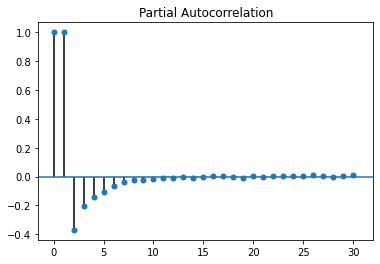

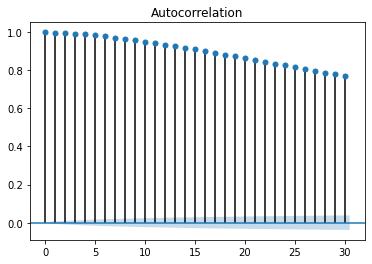

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(newdf['ActualWindMW'],lags=30)
acf=plot_acf(newdf['ActualWindMW'],lags=30)

In [18]:
train=X[:len(X)-20]
test=X[len(X)-20:]

In [19]:
model=AutoReg(train,lags=6).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [20]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:           ActualWindMW   No. Observations:               128539
Model:                     AutoReg(6)   Log Likelihood             -677225.107
Method:               Conditional MLE   S.D. of innovations             46.990
Date:                Sat, 17 Apr 2021   AIC                              7.700
Time:                        10:10:02   BIC                              7.701
Sample:                             6   HQIC                             7.700
                               128539                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           4.3182      0.225     19.183      0.000       3.877       4.759
ActualWindMW.L1     1.2409      0.003    445.897      0.000       1.235       1.246
ActualWindMW.L2    -0.1062      

In [21]:
print(len(train))

128539


In [22]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

In [23]:
len(test), len(pred)

(20, 20)

128539    484.489608
128540    509.083608
128541    532.180563
128542    554.128894
128543    573.091835
128544    589.718736
128545    604.863026
128546    618.764709
128547    631.525267
128548    643.230187
128549    654.063901
128550    664.175432
128551    673.662962
128552    682.606469
128553    691.078603
128554    699.145656
128555    706.862258
128556    714.273321
128557    721.417096
128558    728.326483
dtype: float64


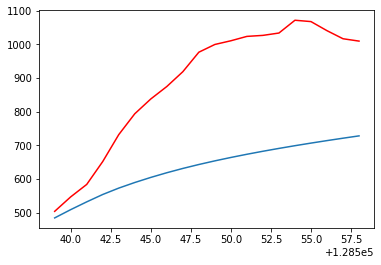

In [24]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

In [25]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))



5 h rmse 277.21073294378095
5 h MAE:  252.4655692925506


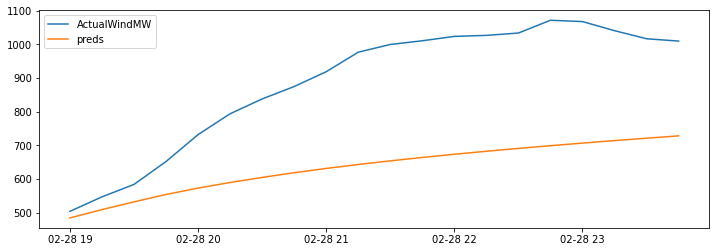

In [26]:
# Catherine: plot with date-time

X_validPreds = newdf.copy()
X_validPreds['preds'] = pred
#X_validPreds['time'] = X_validPreds.date.apply(lambda x: x.strftime("%H:%M"))
hoursValidPred = X_validPreds[-20:]

fig = plt.figure(figsize=(12, 4))
pyplot.plot(hoursValidPred.date, hoursValidPred.ActualWindMW, label="ActualWindMW")
pyplot.plot(hoursValidPred.date, hoursValidPred.preds, label="preds")
pyplot.legend()
#pred.to_csv("C:/Users/E/Documents/prediction2.csv")
print("5 h rmse", sqrt(mean_squared_error(test, pred)))
print("5 h MAE: ", mean_absolute_error(test, pred))

24 h rmse 195.67195108767933
24 h MAE:  171.3242972259534


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


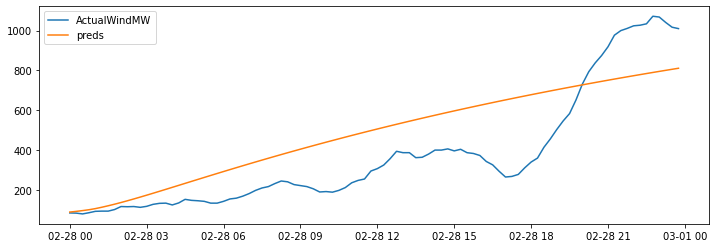

In [27]:
# Catherine: last 24 h preds
train=X[:len(X)-(24*4)]
test=X[len(X)-(24*4):]
model=AutoReg(train,lags=6).fit()
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)
print("24 h rmse", sqrt(mean_squared_error(test, pred)))
print("24 h MAE: ", mean_absolute_error(test, pred))
MAE24 = mean_absolute_error(test, pred)

X_validPreds['preds'] = pred
hoursValidPred = X_validPreds[-(24*4):]

fig = plt.figure(figsize=(12, 4))
pyplot.plot(hoursValidPred.date, hoursValidPred.ActualWindMW, label="ActualWindMW")
pyplot.plot(hoursValidPred.date, hoursValidPred.preds, label="preds")
pyplot.legend()

24 h rmse 909.3386244943678
24 h MAE:  815.7973105308869


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


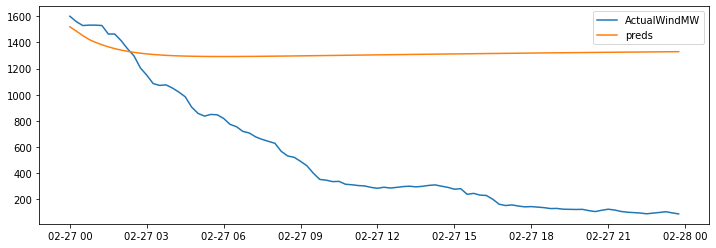

In [28]:
# Catherine: prev 24 h preds
train=X[:len(X)-2*(24*4)]
test=X[len(X)-2*(24*4):-(24*4)]
model=AutoReg(train,lags=6).fit()
pred=model.predict(start=len(train),end=len(X)-(24*4)-1,dynamic=False)
print("24 h rmse", sqrt(mean_squared_error(test, pred)))
print("24 h MAE: ", mean_absolute_error(test, pred))
MAE24 = MAE24 + mean_absolute_error(test, pred)

X_validPreds['preds'] = pred
hoursValidPred = X_validPreds[-2*(24*4):-(24*4)]

fig = plt.figure(figsize=(12, 4))
pyplot.plot(hoursValidPred.date, hoursValidPred.ActualWindMW, label="ActualWindMW")
pyplot.plot(hoursValidPred.date, hoursValidPred.preds, label="preds")
pyplot.legend()

24 h rmse 909.3386244943678
24 h MAE:  815.7973105308869


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


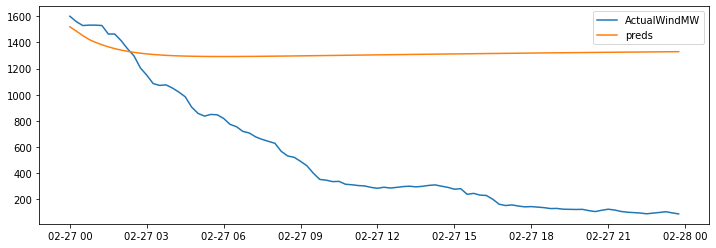

In [29]:
# Catherine: prev 24 h preds
train=X[:len(X)-2*(24*4)]
test=X[len(X)-2*(24*4):-(24*4)]
model=AutoReg(train,lags=6).fit()
pred=model.predict(start=len(train),end=len(X)-(24*4)-1,dynamic=False)
print("24 h rmse", sqrt(mean_squared_error(test, pred)))
print("24 h MAE: ", mean_absolute_error(test, pred))
MAE24 = MAE24 + mean_absolute_error(test, pred)

X_validPreds['preds'] = pred
hoursValidPred = X_validPreds[-2*(24*4):-(24*4)]

fig = plt.figure(figsize=(12, 4))
pyplot.plot(hoursValidPred.date, hoursValidPred.ActualWindMW, label="ActualWindMW")
pyplot.plot(hoursValidPred.date, hoursValidPred.preds, label="preds")
pyplot.legend()

24 h rmse 667.2140975472327
24 h MAE:  530.4429643226072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


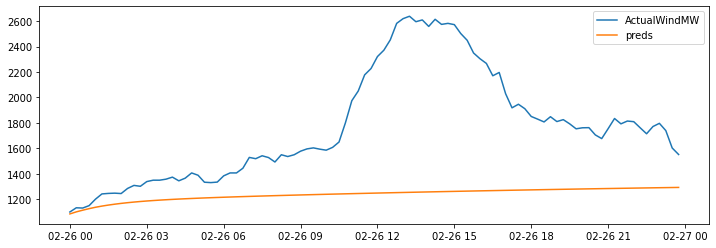

In [30]:
# Catherine: prev 24 h preds
train=X[:len(X)-3*(24*4)]
test=X[len(X)-3*(24*4):-2*(24*4)]
model=AutoReg(train,lags=6).fit()
pred=model.predict(start=len(train),end=len(X)-2*(24*4)-1,dynamic=False)
print("24 h rmse", sqrt(mean_squared_error(test, pred)))
print("24 h MAE: ", mean_absolute_error(test, pred))
MAE24 = MAE24 + mean_absolute_error(test, pred)

X_validPreds['preds'] = pred
hoursValidPred = X_validPreds[-3*(24*4):-2*(24*4)]

fig = plt.figure(figsize=(12, 4))
pyplot.plot(hoursValidPred.date, hoursValidPred.ActualWindMW, label="ActualWindMW")
pyplot.plot(hoursValidPred.date, hoursValidPred.preds, label="preds")
pyplot.legend()

In [31]:
print("Average MAE for 4 days: " + str(MAE24 / 4))

Average MAE for 4 days: 583.3404706525836
